In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#levantamento dos cursos da UEP ofertados no site do senac PE no dia 26-4-18
CursosUepSite = pd.read_csv('levantamentoUepSite.CSV' ,delimiter=';' , encoding='ISO-8859-1')

In [82]:
#todos os cursos encontrados
len(CursosUepSite)

59

In [3]:
CursosUepSite.head()

,curso,Unidade,Area,Carga(h),turno,vagas,dias,preco,tipo,parcelas,local
0,"contas a pagar, receber e tesouraria",UEP,gestão,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
1,Agente cultural,UEP,comunicação,160,tarde,20,seg a sex,640,qualificação profissional,3,sto amaro
2,Marketing e midias,UEP,Comercio,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
3,Aperfeiçoamento ilustrador,UEP,Artes,80,manha,22,ter e qui,360,Aperfeiçoamento,2,sto amaro
4,Assistente Adm,UEP,gestão,160,noite,28,seg a sex,880,qualificação profissional,3,brasilar


In [47]:
#dados recolhidos
CursosUepSite.columns

Index(['curso', 'Unidade', 'Area', 'Carga(h)', 'turno', 'vagas', 'dias',
       'preço ', 'tipo', 'parcelas', 'local'],
      dtype='object')

In [13]:
#separados por area
CursosUepSite['Area'].value_counts()

gestão                19
Beleza                17
Artes                 15
hospitalidade         12
Produção alimentos     7
design                 7
saude                  6
comunicação            6
Comercio               5
Moda                   1
segurança              1
Name: Area, dtype: int64

In [15]:
CursoGestao = CursosUepSite[CursosUepSite['Area']== "gestão"]
CursoSaude = CursosUepSite[CursosUepSite['Area']== "saude"]

In [18]:
len(CursoGestao)

19

In [19]:
len(CursoSaude)

6

In [21]:
corelacaoCursoSaude = CursoSaude.drop(CursoSaude.columns[[0,1,2,4, 5,6,8,9,10]], axis=1)
corelacaoCursoSaude


,Carga(h),preco
6,40,210
11,160,624
19,400,1759
20,400,1759
48,340,1500
53,1800,6720


In [23]:
corelacaoCursoGestao = CursoGestao.drop(CursoGestao.columns[[0,1,2,4, 5,6,8,9,10]], axis=1)
corelacaoCursoGestao

,Carga(h),preco
0,15,180
4,160,880
5,160,880
7,15,190
8,15,180
9,15,180
10,15,180
21,15,180
23,15,180
31,15,180


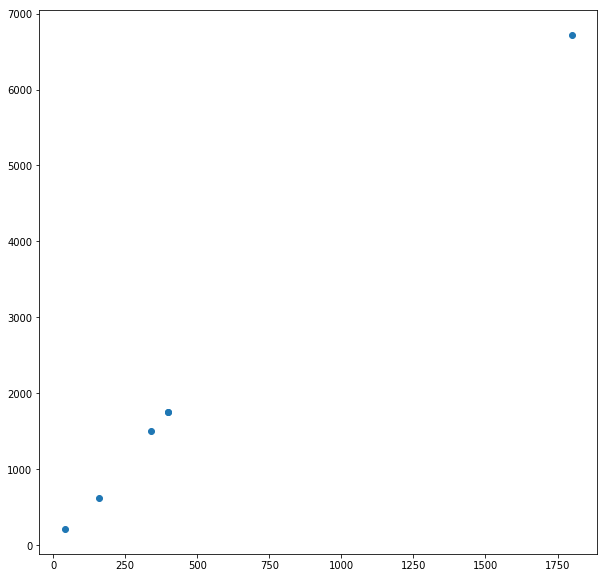

In [17]:
plt.rcParams['figure.figsize'] = (10,10)
x = CursoSaude['Carga(h)']
y = CursoSaude['preco']
 
# plot grafico de dispersao
#cruzando os dados de carga (h) e preço do curso
plt.scatter(x, y)

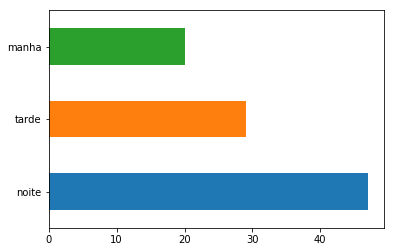

In [5]:
#separados por turno
CursosUepSite['turno'].value_counts().plot(kind='barh')

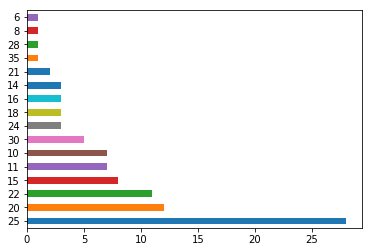

In [6]:
#separado pela quantidade de vagas por turma
CursosUepSite['vagas'].value_counts().plot(kind='barh')

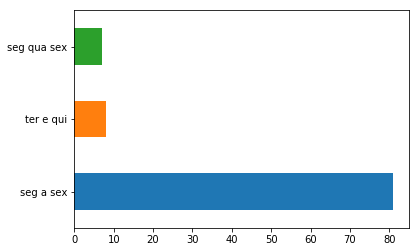

In [7]:
#separado por dias de aula
CursosUepSite['dias'].value_counts().plot(kind='barh')

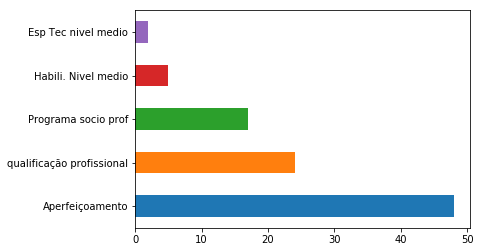

In [8]:
#separado por tipos de curso
CursosUepSite['tipo'].value_counts().plot(kind='barh')

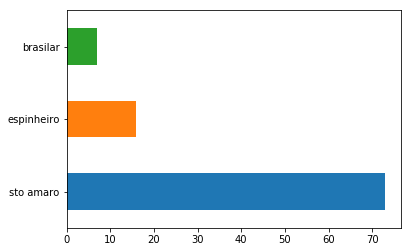

In [9]:
#separados por local
CursosUepSite['local'].value_counts().plot(kind='barh')

In [10]:
# A correlação mostra quanto uma variavel influencia a outra, vamos medir a corelação entre as colunas
# 0 = relação nenhuma
#1 = relação alta
print(CursosUepSite.corr())

          Carga(h)     vagas     preco  parcelas
Carga(h)  1.000000  0.323091  0.954608  0.967958
vagas     0.323091  1.000000  0.242451  0.361363
preco     0.954608  0.242451  1.000000  0.941160
parcelas  0.967958  0.361363  0.941160  1.000000


In [11]:
#filtrando as colunas carga horária e preço para analisar a relação entre elas
corelacaoPrecoCarga = CursosUepSite.drop(CursosUepSite.columns[[0,1,2,4, 5,6,8,9,10]], axis=1)
corelacaoPrecoCarga


,Carga(h),preco
0,15,180
1,160,640
2,15,180
3,80,360
4,160,880
5,160,880
6,40,210
7,15,190
8,15,180
9,15,180


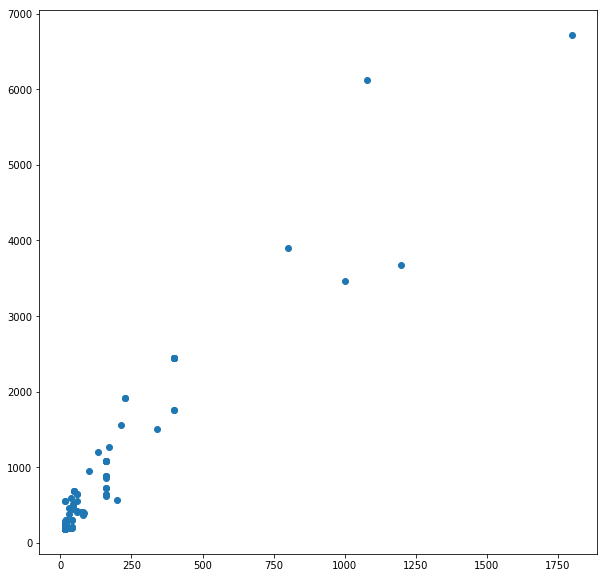

In [12]:
plt.rcParams['figure.figsize'] = (10,10)
x = CursosUepSite['Carga(h)']
y = CursosUepSite['preco']
 
# plot grafico de dispersao
#cruzando os dados de carga (h) e preço do curso
plt.scatter(x, y)

In [46]:
print("obtendo uma formula para ajudar no ajuste de preço")
print("y = preço curso")
print("x= carga horária")
from IPython.display import Image
from IPython.core.display import HTML
Image(url="cargaH_valorCurso_.jpg")

obtendo uma formula para ajudar no ajuste de preço
y = preço curso
x= carga horária


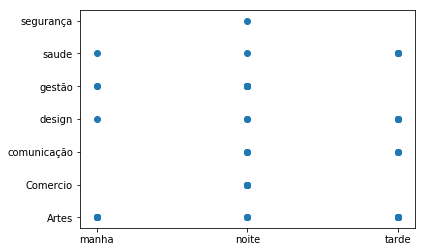

In [50]:
y = CursosUepSite['Area']
x = CursosUepSite['turno']
 
# plot grafico de dispersao
#cruzando os dados por turnos e áreas
plt.scatter(x, y)

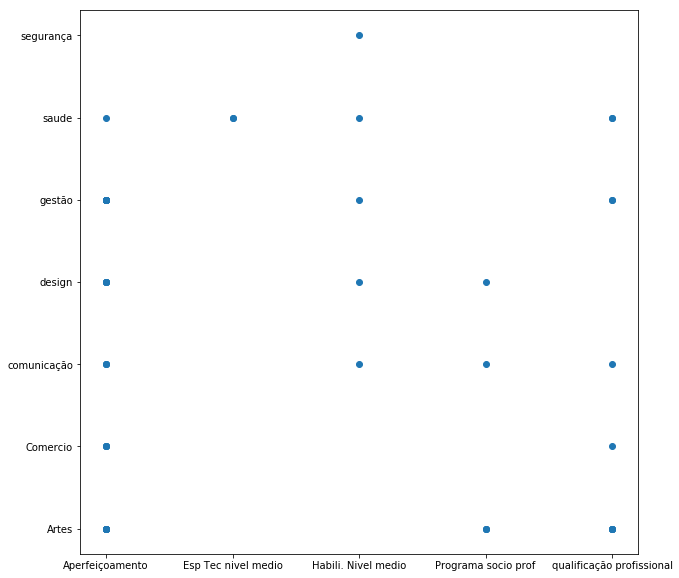

In [57]:
plt.rcParams['figure.figsize'] = (10,10)
y = CursosUepSite['Area']
x = CursosUepSite['tipo']
 
# plot grafico de dispersao
#cruzando os dados de Area   tipos
plt.scatter(x, y)


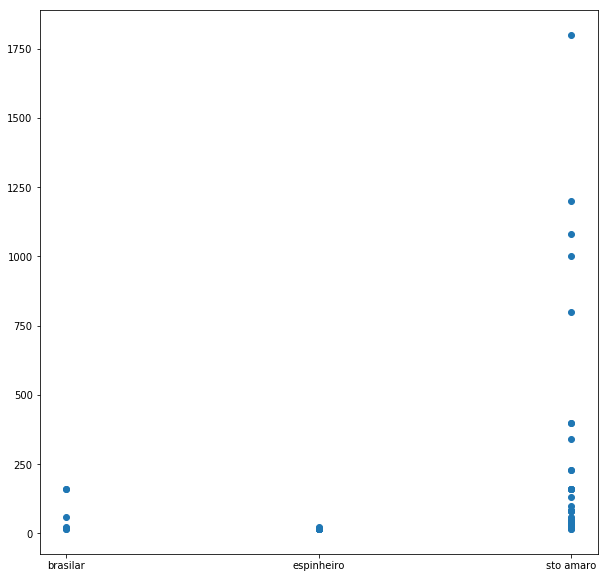

In [61]:
plt.rcParams['figure.figsize'] = (10,10)
x = CursosUepSite['local']
y = CursosUepSite['Carga(h)']
 
# plot grafico de dispersao
#cruzando os dados de local e carga horária
plt.scatter(x, y)


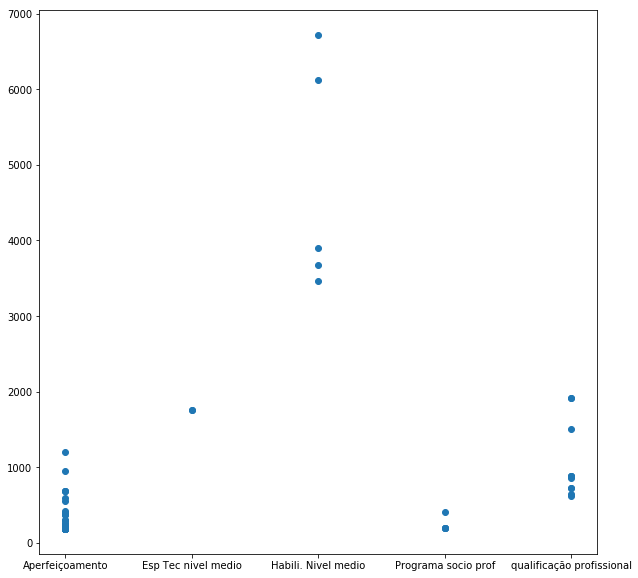

In [77]:
plt.rcParams['figure.figsize'] = (10,10)
x = CursosUepSite['tipo']
y = CursosUepSite['preco']
 
# plot grafico de dispersao
#cruzando os dados de tipo e preço
plt.scatter(x, y)

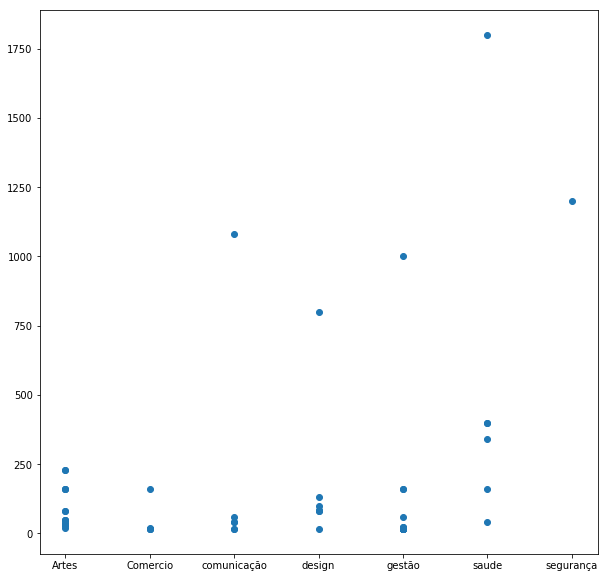

In [81]:
plt.rcParams['figure.figsize'] = (10,10)
y = CursosUepSite["Carga(h)"]
x = CursosUepSite['Area']
 
# plot grafico de dispersao
#cruzando os dados de carga h e area

In [87]:
CursosUepSite.head()

,curso,Unidade,Area,Carga(h),turno,vagas,dias,preco,tipo,parcelas,local
0,"contas a pagar, receber e tesouraria",UEP,gestão,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
1,Agente cultural,UEP,comunicação,16,tarde,20,seg a sex,640,qualificação profissional,3,sto amaro
2,Marketing e midias,UEP,Comercio,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
3,Aperfeiçoamento ilustrador,UEP,Artes,80,manha,22,ter e qui,360,Aperfeiçoamento,2,sto amaro
4,Assistente Adm,UEP,gestão,160,noite,28,seg a sex,880,qualificação profissional,3,brasilar
